In [ ]:
##visualize distribution of the diffusion generated cells

In [74]:
import os
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import umap
import seaborn as sns
from sklearn.manifold import TSNE
import torch
import torch.distributed as dist
import torch.nn.functional as F


In [15]:
##load latent embedding
with open('/home/latent_embedding.pkl', 'rb') as file:
    data0 = pickle.load(file)
data0['pbmc_cell_inf']['kang_cell_type'] = data0['pbmc_cell_inf']['kang_cell_type'].astype(str)
data0['pbmc_cell_inf']['disease'] = data0['pbmc_cell_inf']['disease'].astype(str)
data0['pbmc_cell_inf']['label'] = data0['pbmc_cell_inf']['disease']+'_'+data0['pbmc_cell_inf']['kang_cell_type']
celltype00 = np.array(data0['pbmc_cell_inf']['label'])

In [20]:
data0['pbmc_cell_inf']['label'].value_counts()

label
stim_CD4 T cells          2807
ctrl_CD4 T cells          2282
ctrl_CD14+ Monocytes      2189
stim_CD14+ Monocytes      1994
stim_B cells               710
stim_FCGR3A+ Monocytes     705
ctrl_FCGR3A+ Monocytes     646
ctrl_B cells               614
stim_NK cells              339
ctrl_NK cells              299
stim_CD8 T cells           295
ctrl_CD8 T cells           269
stim_Dendritic cells       202
ctrl_Dendritic cells       201
stim_Megakaryocytes         66
ctrl_Megakaryocytes         54
Name: count, dtype: int64

In [11]:
ctrl_CD4_T_mat = np.load("/home/diffusion/scDiffusion/samplefolder/ctrl_CD4 T cells.npz")
stim_B_mat = np.load("/home/diffusion/scDiffusion/samplefolder/stim_B cells.npz")
stim_CD14_Monocytes_mat = np.load("/home/diffusion/scDiffusion/samplefolder/stim_CD14+ Monocytes.npz")

In [231]:
stim_B_mat['cell_gen'].shape

(416, 1303)

In [13]:
ctrl_CD4_T_mat['cell_gen'].shape

(402, 1303)

In [14]:
stim_CD14_Monocytes_mat['cell_gen'].shape

(413, 1303)

In [22]:
data0['pbmc_tp'].shape

(13672, 1303)

(array([  3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   4.,   1.,   2.,   7.,   3.,  12.,  23.,  24.,  41.,
         44.,  71., 131., 181., 286., 371.,  85.,  12.]),
 array([-102.61381531,  -98.85694122,  -95.10005951,  -91.34318542,
         -87.58630371,  -83.82942963,  -80.07255554,  -76.31567383,
         -72.55879974,  -68.80191803,  -65.04504395,  -61.28816605,
         -57.53129196,  -53.77441406,  -50.01753616,  -46.26065826,
         -42.50378036,  -38.74690628,  -34.99002838,  -31.23315048,
         -27.47627449,  -23.71939659,  -19.9625206 ,  -16.2056427 ,
         -12.44876575,   -8.69188881,   -4.93501139,   -1.17813432,
           2.57874274,    6.33561993,   10.09249687]),
 <BarContainer object of 30 artists>)

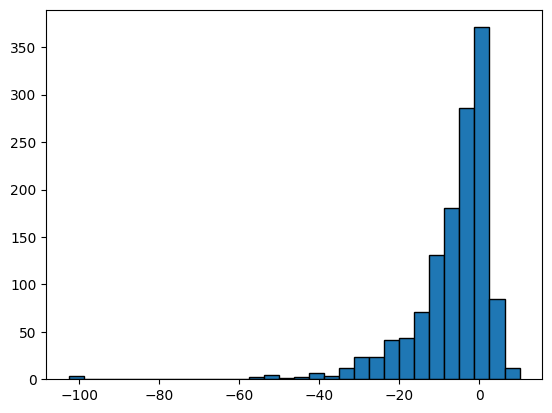

In [86]:
plt.hist(data0['pbmc_tp'][0,], bins=30, edgecolor='black')

In [23]:
data0['pbmc_cell_inf'].shape
##disease   kang_cell_type

(13672, 10)

In [43]:
type(stim_CD14_Monocytes_mat['cell_gen'])

numpy.ndarray

In [42]:
len(new_label)

14085

In [44]:
type(data0['pbmc_tp'])

numpy.ndarray

In [129]:
##add previous normalization
normalized_dat = F.normalize(torch.tensor(data0['pbmc_tp']), p=2, dim=1).numpy()
normalized_new_emb_stim_CD14_Monocytes = np.concatenate((normalized_dat, stim_CD14_Monocytes_mat['cell_gen']), axis=0)
normalized_new_emb_ctrl_CD4_T_mat = np.concatenate((normalized_dat, ctrl_CD4_T_mat['cell_gen']), axis=0)
normalized_new_emb_stim_B_mat = np.concatenate((normalized_dat, stim_B_mat['cell_gen']), axis=0)
new_emb_stim_CD14_Monocytes = np.concatenate((data0['pbmc_tp'], stim_CD14_Monocytes_mat['cell_gen']), axis=0)
normalized_new_emb_all_mat = np.concatenate((normalized_dat, stim_CD14_Monocytes_mat['cell_gen'], ctrl_CD4_T_mat['cell_gen'],stim_B_mat['cell_gen']), axis=0)

(array([  3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   4.,   1.,   2.,   7.,   3.,  12.,  23.,  24.,  41.,
         44.,  71., 131., 181., 286., 371.,  85.,  12.]),
 array([-0.23222373, -0.22372161, -0.21521947, -0.20671734, -0.19821522,
        -0.18971308, -0.18121095, -0.17270882, -0.1642067 , -0.15570456,
        -0.14720243, -0.13870031, -0.13019817, -0.12169604, -0.11319391,
        -0.10469178, -0.09618965, -0.08768752, -0.07918539, -0.07068326,
        -0.06218113, -0.053679  , -0.04517687, -0.03667474, -0.02817261,
        -0.01967048, -0.01116835, -0.00266622,  0.00583591,  0.01433804,
         0.02284017]),
 <BarContainer object of 30 artists>)

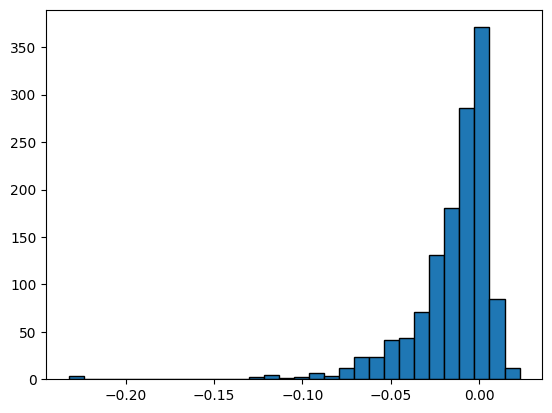

In [192]:
plt.hist(normalized_dat[0,], bins=30, edgecolor='black') 

In [137]:
normalized_new_emb_ctrl_CD4_T_mat.shape

(14074, 1303)

In [138]:
normalized_new_emb_stim_B_mat.shape

(14088, 1303)

In [139]:
normalized_dat.shape

(13672, 1303)

In [140]:
normalized_new_emb_all_mat.shape

(14903, 1303)

In [ ]:
new_emb_stim_CD14_Monocytes.shape

In [30]:
data0['pbmc_cell_inf']['label']

AAACATACATTTCC-1_1-1    ctrl_CD14+ Monocytes
AAACATACCAGAAA-1_1-1    ctrl_CD14+ Monocytes
AAACATACCTCGCT-1_1-1    ctrl_CD14+ Monocytes
AAACATACCTGGTA-1_1-1    ctrl_Dendritic cells
AAACATACGATGAA-1_1-1        ctrl_CD4 T cells
                                ...         
TTTGCATGAACGAA-1_2-1    stim_CD14+ Monocytes
TTTGCATGACGTAC-1_2-1        stim_CD4 T cells
TTTGCATGCCTGTC-1_2-1            stim_B cells
TTTGCATGCTAAGC-1_2-1        stim_CD4 T cells
TTTGCATGGGACGA-1_2-1        stim_CD4 T cells
Name: label, Length: 13672, dtype: object

In [263]:
# Initialize t-SNE and transform the normalized data
##for ctrl CD4 T
#normalized_new_emb_stim_CD14_Monocytes = np.concatenate((normalized_dat, stim_CD14_Monocytes_mat['cell_gen']), axis=0)
#normalized_new_emb_ctrl_CD4_T_mat = np.concatenate((normalized_dat, ctrl_CD4_T_mat['cell_gen']), axis=0)
#normalized_new_emb_stim_B_mat = np.concatenate((normalized_dat, stim_B_mat['cell_gen']), axis=0)
#ctrl_CD4_T_mat = np.load("/home/diffusion/scDiffusion/samplefolder/ctrl_CD4 T cells.npz")
#stim_B_mat = np.load("/home/diffusion/scDiffusion/samplefolder/stim_B cells.npz")
#stim_CD14_Monocytes_mat = np.load("/home/diffusion/scDiffusion/samplefolder/stim_CD14+ Monocytes.npz")
#

tsne_model = TSNE(n_components=2, random_state=42)
tsne_result_normal = tsne_model.fit_transform(normalized_new_emb_ctrl_CD4_T_mat)

##process colors
new_label = data0['pbmc_cell_inf']['label'].tolist() + (['diff ctrl CD4+ T cells']*(ctrl_CD4_T_mat['cell_gen'].shape[0]))
new_condition = data0['pbmc_cell_inf']['disease'].tolist() + (['diff ctrl']*(ctrl_CD4_T_mat['cell_gen'].shape[0]))
new_ct = data0['pbmc_cell_inf']['kang_cell_type'].tolist() + (['diff ctrl CD4+ T cells']*(ctrl_CD4_T_mat['cell_gen'].shape[0]))

# Map each unique label to a distinct color
unique_labels = list(set(new_label))
unique_labels_cond = list(set(new_condition))
unique_labels_ct = list(set(new_ct))

palette = plt.get_cmap('tab20').colors  # Get 20 distinct colors
label_to_color = {label: color for label, color in zip(unique_labels, palette)}
label_to_color_cond = {label: palette[i % 20] for i, label in enumerate(unique_labels_cond)}
label_to_color_ct = {label: palette[i % 20] for i, label in enumerate(unique_labels_ct)}

colors = [label_to_color[label] for label in new_label]
colors_cond = [label_to_color_cond[label] for label in new_condition]
colors_ct = [label_to_color_ct[label] for label in new_ct]

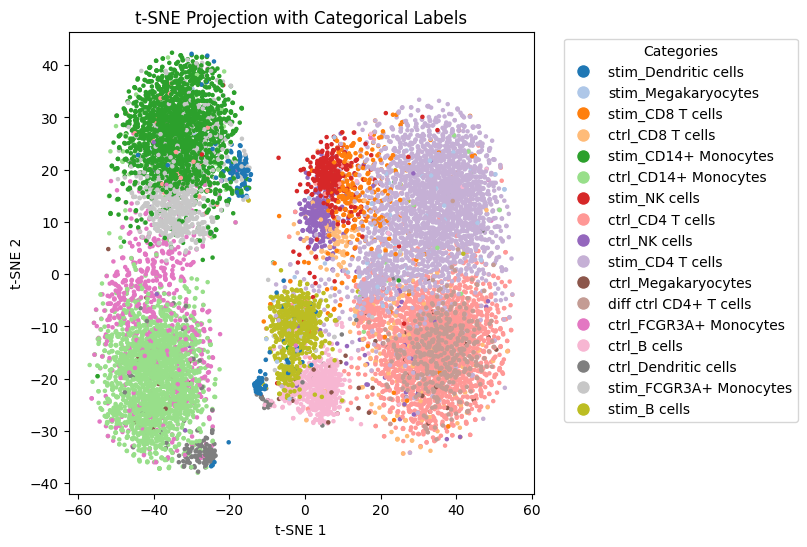

In [264]:
# Plot t-SNE results with colors based on categorical labels
plt.figure(figsize=(6, 6))
scatter = plt.scatter(tsne_result_normal[:, 0], tsne_result_normal[:, 1], c=colors,s=5)

# Create a legend with categorical labels
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=10)
           for label, color in label_to_color.items()]
plt.legend(handles=handles, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize and show plot
plt.title("t-SNE Projection with Categorical Labels")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

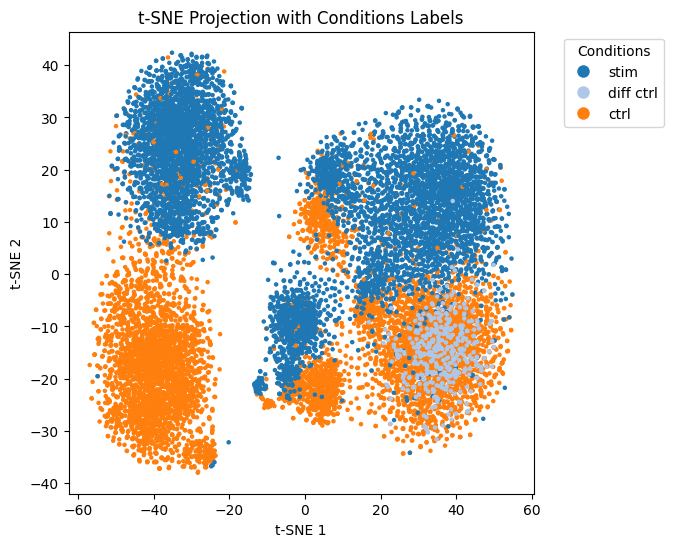

In [265]:
# Plot t-SNE results with colors based on Conditions labels
plt.figure(figsize=(6, 6))
scatter = plt.scatter(tsne_result_normal[:, 0], tsne_result_normal[:, 1], c=colors_cond,s=5)

# Create a legend with Conditions labels
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=10)
           for label, color in label_to_color_cond.items()]
plt.legend(handles=handles, title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize and show plot
plt.title("t-SNE Projection with Conditions Labels")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

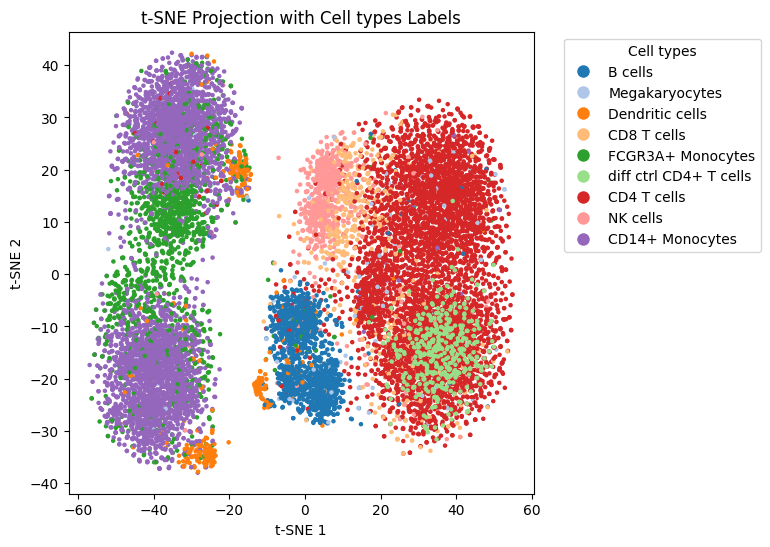

In [266]:
# Plot t-SNE results with colors based on ct labels
plt.figure(figsize=(6, 6))
scatter = plt.scatter(tsne_result_normal[:, 0], tsne_result_normal[:, 1], c=colors_ct,s=5)

# Create a legend with Conditions labels
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=10)
           for label, color in label_to_color_ct.items()]
plt.legend(handles=handles, title="Cell types", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize and show plot
plt.title("t-SNE Projection with Cell types Labels")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

Fold 1


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Validation Accuracy: 0.9845847836897066
Validation AUROC: 0.9904684618930548
Fold 2


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Validation Accuracy: 0.9835902536051716
Validation AUROC: 0.9915104486785495
Fold 3


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Validation Accuracy: 0.9850746268656716
Validation AUROC: 0.9861050709229532
Fold 4


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Validation Accuracy: 0.9800995024875622
Validation AUROC: 0.9806921707928061
Fold 5


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Validation Accuracy: 0.9796019900497512
Validation AUROC: 0.9890578536799857


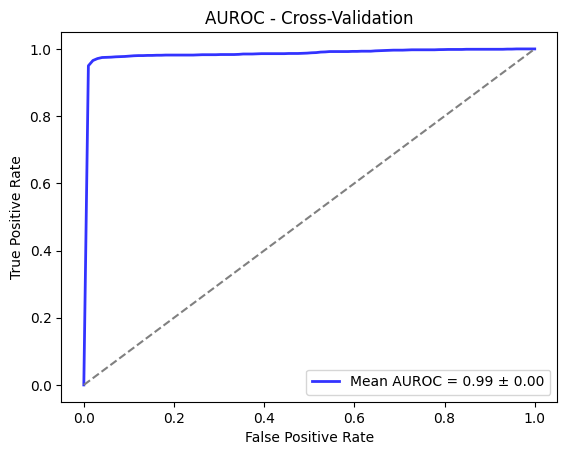

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Test Accuracy: 0.982098458478369
Test AUROC: 0.9801202519870928
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1628
           1       0.97      0.93      0.95       383

    accuracy                           0.98      2011
   macro avg       0.98      0.96      0.97      2011
weighted avg       0.98      0.98      0.98      2011



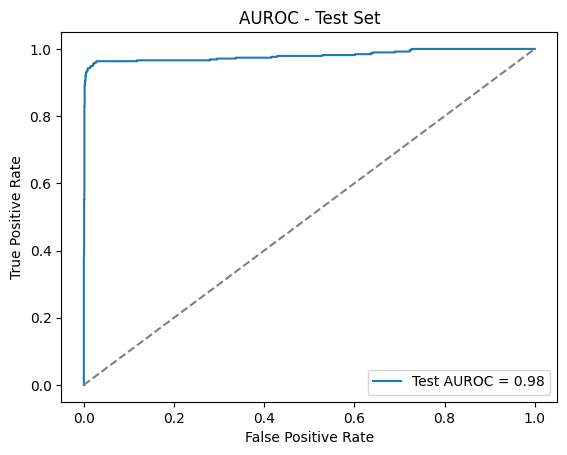

In [251]:
#conduct a classifer of diffusion ctrl CD4+ T cells and five folder cross-validation and plot AUROC curve
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming `normalized_new_emb_ctrl_CD4_T_mat` and `new_label` are already loaded
# normalized_new_emb_ctrl_CD4_T_mat: 10000 x 1300 numpy array
# new_label: 10000-element list

# Step 1: Encode the labels
labels = np.array(new_label)
target_labels = ['diff ctrl CD4+ T cells', 'ctrl_CD4 T cells']
binary_labels = np.where(np.isin(labels, target_labels), 1, 0)

# Step 2: Train-test split (5:1:1 proportion)
X_train, X_temp, y_train, y_temp = train_test_split(
    normalized_new_emb_ctrl_CD4_T_mat, binary_labels, test_size=2/7, stratify=binary_labels, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Step 3: Cross-validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Training with cross-validation and AUROC calculation
mean_fpr = np.linspace(0, 1, 100)  # For mean AUROC curve
tprs = []
aucs = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"Fold {fold + 1}")
    X_tr, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_tr, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # XGBoost model
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )
    
    # Train the model
    model.fit(X_tr, y_tr, eval_set=[(X_val_fold, y_val_fold)], early_stopping_rounds=10, verbose=False)
    
    # Evaluate on validation set
    y_pred_val_prob = model.predict_proba(X_val_fold)[:, 1]
    y_pred_val = model.predict(X_val_fold)
    roc_auc = roc_auc_score(y_val_fold, y_pred_val_prob)
    print(f"Validation Accuracy: {accuracy_score(y_val_fold, y_pred_val)}")
    print(f"Validation AUROC: {roc_auc}")
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_val_fold, y_pred_val_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)

# Plot AUROC for cross-validation
plt.figure()
#for i, tpr in enumerate(tprs):
#    plt.plot(mean_fpr, tpr, alpha=0.3, label=f'Fold {i + 1} AUROC = {aucs[i]:.2f}')
    
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean AUROC = {mean_auc:.2f} ± {std_auc:.2f}', lw=2, alpha=0.8)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC - Cross-Validation')
plt.legend(loc='lower right')
plt.show()

# Step 5: Final testing with AUROC
final_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train on entire training set
final_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

# Test set evaluation
y_pred_test_prob = final_model.predict_proba(X_test)[:, 1]
y_pred_test = final_model.predict(X_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test_prob)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test AUROC:", roc_auc_test)
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# Plot AUROC for test set
fpr, tpr, _ = roc_curve(y_test, y_pred_test_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'Test AUROC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC - Test Set')
plt.legend(loc='lower right')
plt.show()

Fold 1


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 1 AUPRC: 0.98
Fold 2


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 2 AUPRC: 0.98
Fold 3


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 3 AUPRC: 0.98
Fold 4


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 4 AUPRC: 0.97
Fold 5


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Fold 5 AUPRC: 0.98


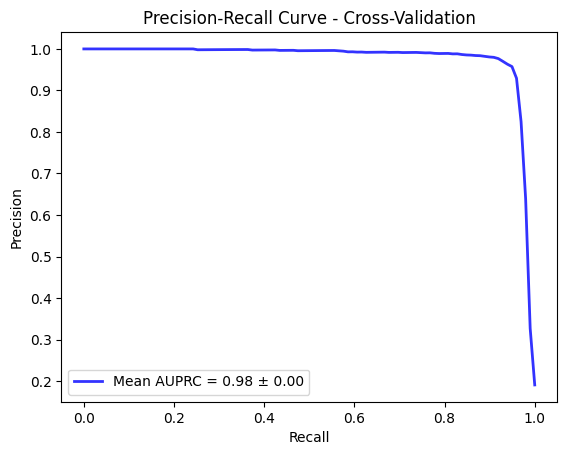

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Test AUPRC: 0.97
Average Precision Score (Test): 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1628
           1       0.97      0.93      0.95       383

    accuracy                           0.98      2011
   macro avg       0.98      0.96      0.97      2011
weighted avg       0.98      0.98      0.98      2011



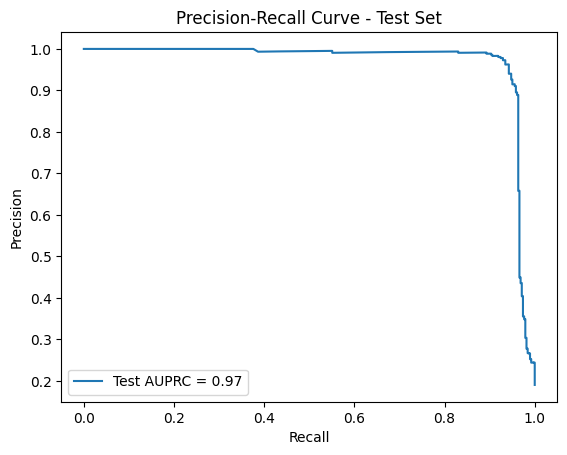

In [253]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, StratifiedKFold
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Assuming `normalized_new_emb_ctrl_CD4_T_mat` and `new_label` are already loaded
# normalized_new_emb_ctrl_CD4_T_mat: 10000 x 1300 numpy array
# new_label: 10000-element list

# Step 1: Encode the labels
labels = np.array(new_label)
target_labels = ['diff ctrl CD4+ T cells', 'ctrl_CD4 T cells']
binary_labels = np.where(np.isin(labels, target_labels), 1, 0)

# Step 2: Train-test split (5:1:1 proportion)
X_train, X_temp, y_train, y_temp = train_test_split(
    normalized_new_emb_ctrl_CD4_T_mat, binary_labels, test_size=2/7, stratify=binary_labels, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Step 3: Cross-validation setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Training with cross-validation and AUPRC calculation
pr_curves = []
mean_recall = np.linspace(0, 1, 100)  # For mean PR curve
auprcs = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"Fold {fold + 1}")
    X_tr, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_tr, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # XGBoost model
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )
    
    # Train the model
    model.fit(X_tr, y_tr, eval_set=[(X_val_fold, y_val_fold)], early_stopping_rounds=10, verbose=False)
    
    # Evaluate on validation set
    y_pred_val_prob = model.predict_proba(X_val_fold)[:, 1]
    
    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_val_fold, y_pred_val_prob)
    pr_curves.append(np.interp(mean_recall, recall[::-1], precision[::-1]))
    pr_curves[-1][0] = 1.0  # Precision starts at 1.0
    
    # Compute AUPRC
    auprc = auc(recall, precision)
    auprcs.append(auprc)
    print(f"Fold {fold + 1} AUPRC: {auprc:.2f}")

# Plot AUPRC for cross-validation
plt.figure()
#for i, pr in enumerate(pr_curves):
#    plt.plot(mean_recall, pr, alpha=0.3, label=f'Fold {i + 1} AUPRC = {auprcs[i]:.2f}')
    
mean_precision = np.mean(pr_curves, axis=0)
mean_auprc = np.mean(auprcs)
std_auprc = np.std(auprcs)
plt.plot(mean_recall, mean_precision, color='b', label=f'Mean AUPRC = {mean_auprc:.2f} ± {std_auprc:.2f}', lw=2, alpha=0.8)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Cross-Validation')
plt.legend(loc='lower left')
plt.show()

# Step 5: Final testing with AUPRC
final_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train on entire training set
final_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

# Test set evaluation
y_pred_test_prob = final_model.predict_proba(X_test)[:, 1]
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_test_prob)
auprc_test = auc(recall_test, precision_test)
avg_precision_test = average_precision_score(y_test, y_pred_test_prob)

print(f"Test AUPRC: {auprc_test:.2f}")
print(f"Average Precision Score (Test): {avg_precision_test:.2f}")
print("Classification Report:\n", classification_report(y_test, final_model.predict(X_test)))

# Plot AUPRC for test set
plt.figure()
plt.plot(recall_test, precision_test, label=f'Test AUPRC = {auprc_test:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test Set')
plt.legend(loc='lower left')
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Test Accuracy: 0.982098458478369
Test AUROC: 0.9801202519870928
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1628
           1       0.97      0.93      0.95       383

    accuracy                           0.98      2011
   macro avg       0.98      0.96      0.97      2011
weighted avg       0.98      0.98      0.98      2011



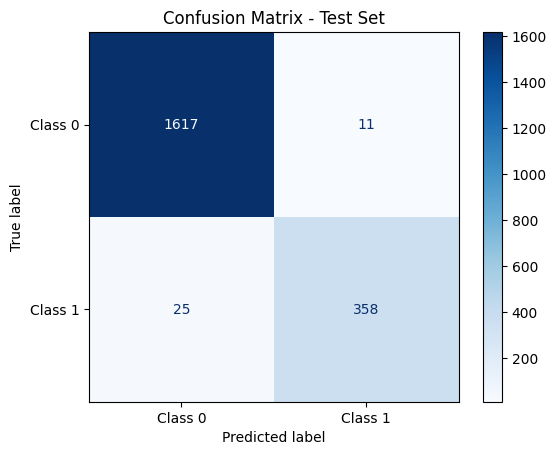

In [250]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 5: Final testing with confusion matrix
final_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train on entire training set
final_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

# Test set evaluation
y_pred_test_prob = final_model.predict_proba(X_test)[:, 1]
y_pred_test = final_model.predict(X_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test_prob)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test AUROC:", roc_auc_test)
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.show()